## 1 预测泰坦尼克号幸存者

这部分就拿决策树来进行简单的参数调节

train.csv是一个892行、12列的数据表格，意味着我们有891个训练样本（表头除外），每个样本有12个特征，我们需要先分析这些特征，以便决定哪个特征可以用来进行模型训练。

- PassengerId：乘客的ID号，这个是顺序编号，用来唯一地标识一名乘客。这个特征和幸存与否无关，我们不使用这个特征。
- Survived：1表示幸存，0表示遇难。这个是我们的标注数据。
- Pclass：仓位等级，是很重要的特征。看过电影的同学都知道（没看过的童鞋赶快去补上），高仓位等级的乘客能更快地达到甲板，从而更容易获救。
- Name：乘客名字，这个特征和幸存与否无关，我们会丢弃这个特征。
- Sex：乘客性别，回想一下电影的情节就知道，由于救生艇数量不够，船长让妇女和儿童先上救生艇。所以这是一个很重要的特征。
- Age：乘客年龄，儿童会优先登上救生艇，身强力壮者的幸存概率也会更高一些。
- SibSp：兄弟姐妹同在船上的数量。
- Parch：同船的父辈人员数量。
- Ticket：乘客票号。我们不使用这个特征。
- Fare：乘客的体热指标。
- Cabin：乘客所在的船舱号。实际上这个特征和幸存与否有一定的关系，比如最早被水淹没的船舱位置，其乘客的幸存概率要低一些。但由于这个特征有大量的缺失值，而且没有更多的数据来对船舱进行归类，因此我们丢弃这个特征的数据。
- Embarked：乘客登船的港口。我们需要把港口数据转换为数值型数据。

我们需要加载csv文件，并做一些预处理，包括：

- 提取Survived列的数据作为模型的标注数据。
- 丢弃不需要的特征数据。
- 对数据进行转换，以便模型处理。比如性别数据，我们需要转换为0和1.
- 处理缺失数据。比如年龄这个特征，有很多缺失值。

In [8]:
import pandas as pd
import numpy as np

# 读取数据，指定第一列为行索引
data = pd.read_csv('./Kaggle_Titanic/train.csv', index_col=0)       # PassengerId作为行索引
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()     # 查看数据集的基本信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
# 丢弃无用的数据
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 处理性别数据，女性为0，男性为1
data['Sex'] = (data['Sex'] == 'male').astype('int')

# 处理登船港口数据
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))

# 处理缺失值
data = data.fillna(0)

data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,1,27.0,0,0,13.00,0
888,1,1,0,19.0,0,0,30.00,0
889,0,3,0,0.0,1,2,23.45,0
890,1,1,1,26.0,0,0,30.00,1
891,0,3,1,32.0,0,0,7.75,2


In [12]:
from sklearn.model_selection import train_test_split

y = data['Survived'].values
X = data.drop(['Survived'], axis=1).values

print(X[:5])
print(y[:5])

[[ 3.      1.     22.      1.      0.      7.25    0.    ]
 [ 1.      0.     38.      1.      0.     71.2833  1.    ]
 [ 3.      0.     26.      0.      0.      7.925   0.    ]
 [ 1.      0.     35.      1.      0.     53.1     0.    ]
 [ 3.      1.     35.      0.      0.      8.05    0.    ]]
[0 1 1 1 0]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train dataset: {0}; test dataset: {1}".format(X_train.shape, X_test.shape))

Train dataset: (712, 7); test dataset: (179, 7)


In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train score: {0}; Test score: {1}".format(train_score, test_score))

Train score: 0.9845505617977528; Test score: 0.7932960893854749


In [15]:
# 参数选择
def cv_score(depth):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 接着构造参数范围，在这个范围内分别计算模型评分，并找出评分最高的模型所对应的参数。
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出交叉验证数据集评分最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print("Best param: {0}; best score: {1}".format(best_param, best_score))

Best param: 7; best score: 0.8156424581005587


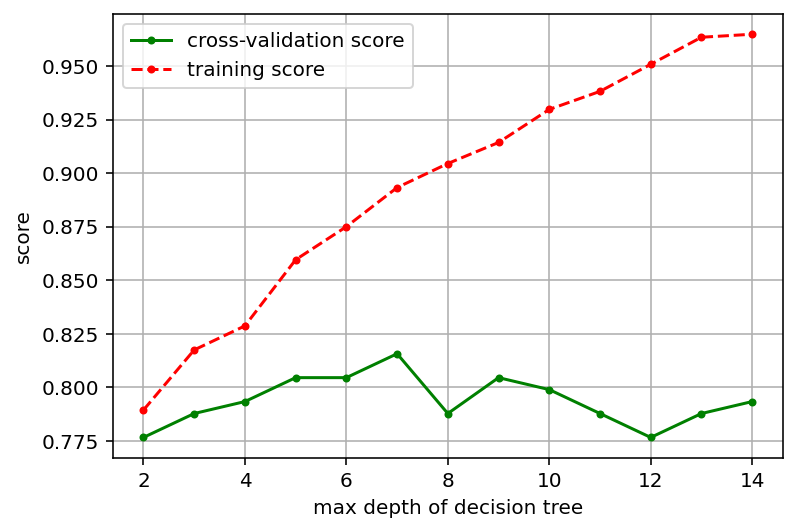

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=144)
plt.grid()
plt.xlabel("max depth of decision tree")
plt.ylabel("score")
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()
plt.savefig("depths_score.png")

Best param: 0.0; best score: 0.8044692737430168


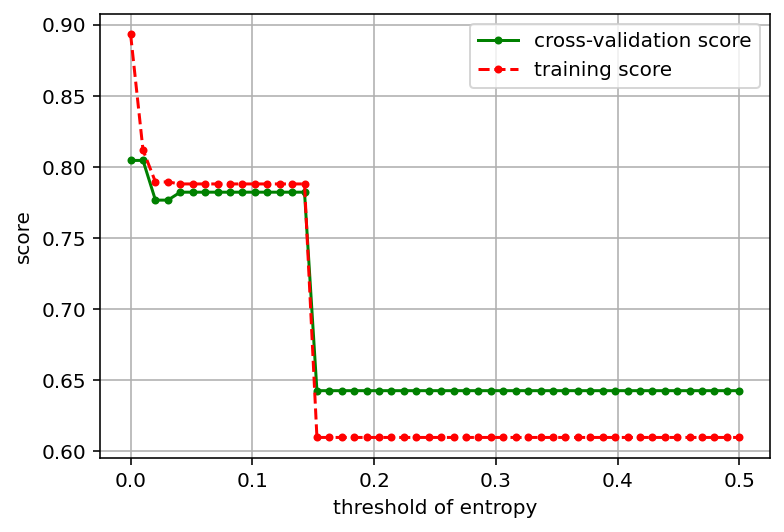

In [25]:
# 参数选择
def cv_score2(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val, max_depth=7)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定参数范围，分别训练模型并计算模型评分
values = np.linspace(0, 0.5, 50)            # 0到0.5之间平分
scores = [cv_score2(c) for c in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出交叉验证数据集评分最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print("Best param: {0}; best score: {1}".format(best_param, best_score))

plt.figure(figsize=(6, 4), dpi=144)
plt.grid()
plt.xlabel("threshold of entropy")
plt.ylabel("score")
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()
plt.savefig("entropy_score.png")

In [28]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
# 设置参数矩阵
param_grid = {'min_impurity_decrease': thresholds}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("Best param: {0}; \n best score: {1}".format(clf.best_params_, clf.best_score_))

Best param: {'min_impurity_decrease': 0.01020408163265306}; 
 best score: 0.794589165777415


In [29]:
def plot_curve(train_size, cv_results, xlabel):
    train_scores_mean = cv_results["mean_train_score"]
    train_scores_std = cv_results["std_train_score"]

    test_scores_mean = cv_results["mean_test_score"]
    test_scores_std = cv_results['std_test_score']

    plt.figure(figsize=(6, 4), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_size, 
                     train_scores_mean -train_scores_std,
                     train_scores_mean + train_scores_std, 
                     color='r', alpha=0.1)
    plt.fill_between(train_size,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     color='g', alpha=0.1)

    plt.plot(train_size, train_scores_mean, ".--", color='r', label='Training score')
    plt.plot(train_size, test_scores_mean, ".--", color='g', label='Cross-validation score')

    plt.legend(loc='best')
    plt.savefig('parameters turning.png')

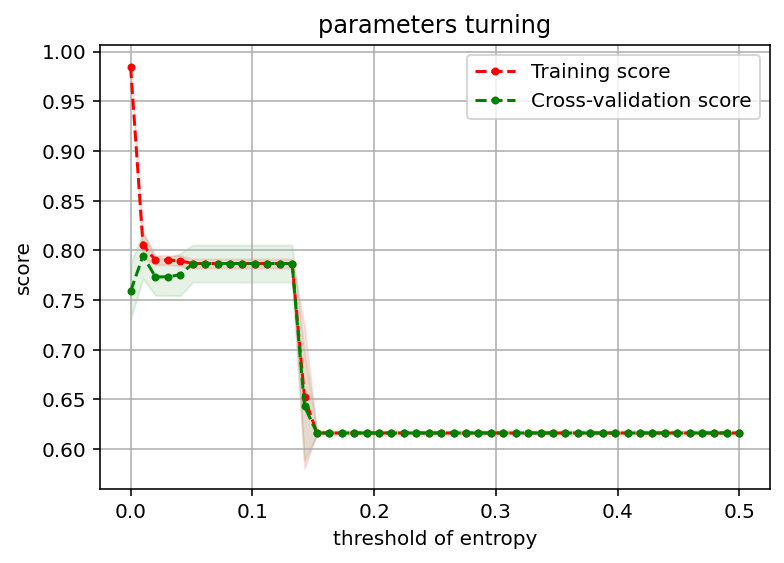

In [30]:
plot_curve(thresholds, clf.cv_results_, xlabel="threshold of entropy")

In [32]:
entropy_thresholds = np.linspace(0, 1, 50)
gini_thresholds = np.linspace(0, 0.5, 50)

param_grid = [
    {'criterion': ['entropy'],
     'min_impurity_decrease': entropy_thresholds},
    {'criterion': ['gini'], 
     'min_impurity_decrease': gini_thresholds},
    {'max_depth': range(2, 10)},
    {'min_samples_split': range(2, 30, 2)}
]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(X, y)
print('best param: {0}; \n best score: {1}'.format(clf.best_params_, clf.best_score_))

best param: {'min_samples_split': 20}; 
 best score: 0.8126231874960768
